### Model training for the Student dataset

In [1]:
%pip install xgboost catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
df=pd.read_csv("data/student_with_avg_score.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [4]:
df.drop(columns=["math_score","reading_score","writing_score"],axis=1,inplace=True)

In [10]:
X=df.drop(columns=["Average_score"])
y=df["Average_score"]

In [12]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Total_score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,282
996,male,group C,high school,free/reduced,none,172
997,female,group C,high school,free/reduced,completed,195
998,female,group D,some college,standard,completed,223


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   Total_score                  1000 non-null   int64  
 6   Average_score                1000 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [13]:
num_cols=X.select_dtypes(include=np.number).columns
cat_cols=X.select_dtypes(include="object").columns

from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder(handle_unknown="ignore")

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",categorical_transformer,cat_cols),
        ("StandardScaler",numeric_transformer,num_cols)
    ]
)

In [14]:
X=preprocessor.fit_transform(X)

In [15]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.06871048]], shape=(1000, 18))

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_test.shape,X_train.shape

((200, 18), (800, 18))

In [19]:
def evaluate_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    return mse,r2,mae

In [21]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge Regression':Ridge(),
    'Lasso Regression':Lasso(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Gradient Boosting Regressor':GradientBoostingRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'XGBoost Regressor':XGBRegressor(),
    'CatBoost Regressor':CatBoostRegressor(verbose=0)
}
results={}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    mse_train,r2_train,mae_train=evaluate_model(model,X_train,y_train,X_train,y_train)
    mse_test,r2_test,mae_test=evaluate_model(model,X_train,y_train,X_test,y_test)
    results[name]={"Train MSE":mse_train,"Train R2":r2_train,"Train MAE":mae_train,"Test MSE":mse_test,"Test R2":r2_test,"Test MAE":mae_test}
    print(f"{name} - Train MSE: {mse_train:.4f}, Train R2: {r2_train:.4f}, Train MAE: {mae_train:.4f}")
    print("------------------------------------------")
    print(f"{name} - Test MSE: {mse_test:.4f}, Test R2: {r2_test:.4f}, Test MAE: {mae_test:.4f}")
    print("==========================================")



    


Linear Regression - Train MSE: 0.0000, Train R2: 1.0000, Train MAE: 0.0000
------------------------------------------
Linear Regression - Test MSE: 0.0000, Test R2: 1.0000, Test MAE: 0.0000
Ridge Regression - Train MSE: 0.0004, Train R2: 1.0000, Train MAE: 0.0169
------------------------------------------
Ridge Regression - Test MSE: 0.0005, Test R2: 1.0000, Test MAE: 0.0179
Lasso Regression - Train MSE: 1.0181, Train R2: 0.9949, Train MAE: 0.8075
------------------------------------------
Lasso Regression - Test MSE: 1.1146, Test R2: 0.9948, Test MAE: 0.8312
Random Forest Regressor - Train MSE: 0.0181, Train R2: 0.9999, Train MAE: 0.0229
------------------------------------------
Random Forest Regressor - Test MSE: 0.8524, Test R2: 0.9960, Test MAE: 0.1146
Gradient Boosting Regressor - Train MSE: 0.0079, Train R2: 1.0000, Train MAE: 0.0609
------------------------------------------
Gradient Boosting Regressor - Test MSE: 0.4620, Test R2: 0.9978, Test MAE: 0.1307
AdaBoost Regressor - T

In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


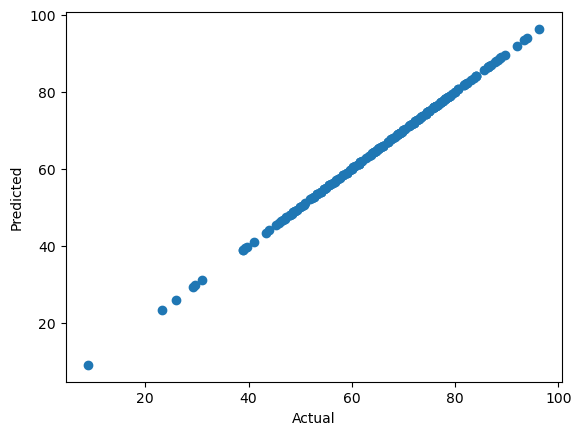

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

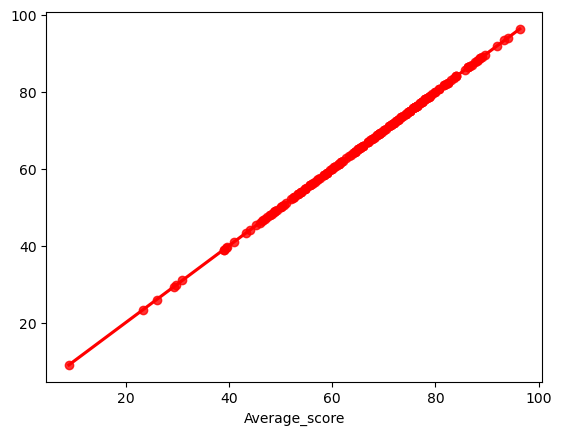

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,87.000000,87.000000,0.000000e+00
737,64.000000,64.000000,7.105427e-15
740,75.000000,75.000000,1.421085e-14
660,74.666667,74.666667,4.263256e-14
411,81.666667,81.666667,0.000000e+00
...,...,...,...
408,55.000000,55.000000,1.421085e-14
332,57.000000,57.000000,1.421085e-14
208,77.000000,77.000000,1.421085e-14
613,72.000000,72.000000,1.421085e-14
